In [317]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [174]:
tips = pd.read_csv("./src/tips.csv", header=0, sep=",")

In [175]:
# liste le nom des colonnes
list(tips) 

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [176]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Manipulation des données

Comment réaliser les opérations classiques en bases de données ?

* Restriction
* Projection
* Tri et limitation des résultats
* Ajout de nouvelles variables (via des valeurs ou un calcul à partir des autres)
* Agrégats
* Modification de la forme du tableau de données
* Jointures 
* Autres opérations, spécifiques à Python

### 1.Restriction

* Sélectionner un certain nombre de lignes de la table, selon une condition
* Fonction `query()`
    * Paramètre : une chaîne de caractères contenant la condition à appliquer

In [177]:
# les factures de plus de 48 seulement
tips.query('total_bill > 48').head(2)

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6


In [178]:
# les factures ayant eu lieu un samedi ou un dimanche seulement
tips.query('day.isin(("Sat", "Sun"))').head(2) # attention : doit être un tuple

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [179]:
# les tables de plus de 4 convives et payées par un homme
tips.query('size > 4 & sex == "Male"').head(2)

,total_bill,tip,sex,smoker,day,time,size
141,34.30,6.7,Male,No,Thur,Lunch,6
142,41.19,5.0,Male,No,Thur,Lunch,5


Reference à une variable : `@nom_variable`

In [180]:
a = 48
tips. query("total_bill > @a").head(2) # equivalent a tips.query('total_bill > 48')

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6


### 2.Projection 

* Sélectionner certaines colonnes de la tables
* Fonction `filter()` :
    * Paramètre `items` : liste des noms à garder
    * Paramètre `axis` : axe à regarder (colonne ou ligne - colonne par défaut pour DataFrame)
    * Paramètre `like` : comparaison à une string
    * Paramètre `regex` : utilisation de **regex**

In [181]:
# sex et total_bill seulement
tips.filter(['sex', 'total_bill']).head(2)

,sex,total_bill
0,Female,16.99
1,Male,10.34


In [182]:
# les features ayant "ti" dans leur nom seulement
tips.filter(like="ti").head(2)

,tip,time
0,1.01,Dinner
1,1.66,Dinner


In [183]:
# les variables ayant la lettre 't' puis la lettre 'i' (avec ou sans caractères entre les 2 lettres)
tips.filter(regex="t*i").head(2)

,total_bill,tip,time,size
0,16.99,1.01,Dinner,2
1,10.34,1.66,Dinner,3


Supprime les doublons avec `drop_duplicate()``

In [184]:
tips.filter(["sex", "smoker"]).drop_duplicates()

,sex,smoker
0,Female,No
1,Male,No
56,Male,Yes
67,Female,Yes


### 3.Tri et limitation des résultats

* Tri : Fonction `sort_values()`
    * Paramètre : la ou les features à utiliser
    * Tri descendant : valeur du paramètre `ascending=False` (`True` par défaut)

In [185]:
# Tri par ordre croissant
tips.sort_values(by='total_bill').head(3)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1
92,5.75,1.0,Female,Yes,Fri,Dinner,2
111,7.25,1.0,Female,No,Sat,Dinner,1


In [186]:
# Tri par ordre decroissant
tips.sort_values(by='total_bill', ascending=False).head(3)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


In [187]:
# Tri avec smoker croissant et total décroissant (No=0, Yes=1)
tips.sort_values(by = ['smoker', 'total_bill'], ascending=[True, False]).head(3)

,total_bill,tip,sex,smoker,day,time,size
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6


### 4.Ajout de nouvelles features

In [188]:
tips_copy = tips.copy()
tips_copy['n_row'] = range(244)
tips_copy['n_row'][:4]

0    0
1    1
2    2
3    3
Name: n_row, dtype: int64

In [189]:
tips_copy['nouv'] = "nouvelle valeur"
tips_copy['nouv'][:4]

0    nouvelle valeur
1    nouvelle valeur
2    nouvelle valeur
3    nouvelle valeur
Name: nouv, dtype: object

* A partir d'un calcul basé sur les autres variables : Fonction `assign()`
    * Renvoie d'un **DataFrame modifié** (original non modifié)

In [190]:
# attention ici, l.size ferait référence à la taille de l, car c'est un mot clé de python
tips.assign(per_person = lambda l: round(l.total_bill / l['size'], 2)).head(3)

,total_bill,tip,sex,smoker,day,time,size,per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00


### 5.Agrégat

* Calcul d'une statistique globale de base : Fonction `aggregate()` (ou `agg()`)
    * Dénombrement, somme, moyenne, minimum, maximum
    * Si un seul calcul : directement les fonctions associées

In [191]:
tips.filter(['total_bill', 'tip', 'size']).aggregate(['count', 'mean'])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672


In [192]:
tips.filter(['total_bill', 'tip', 'size']).mean()

total_bill    19.785943
tip            2.998279
size           2.569672
dtype: float64

* Pour le faire pour chaque modalité d'une feature : Fonction `groupby()`

In [193]:
tips.filter(['sex', 'total_bill', 'tip', 'size']).groupby('sex').mean()

,total_bill,tip,size
sex,,,
Female,18.056897,2.833448,2.459770
Male,20.744076,3.089618,2.630573


### 6.Modification du format d'un data frame (reshaping)

* Tableaux souvent présentés sous la forme individus **X** variables
* Parfois, utile (voire nécessaire) de modifier, via une *pseudo-rotation*, en un tableau avec:
    * Colonne (ou plusieurs) indiquant l'individu concerné
    * Colonne indiquant la feature
    * Colonne avec la valeur de celle-ci
* Fonction `melt()`
    * Ici, utilisation du numéro de ligne `n_row` car pas d'identifiant unique par ligne

In [194]:
tips['n_row'] = range(244)
tips2 = tips.melt(id_vars="n_row")
print(tips.shape, tips2.shape) 
print(tips.shape[0]*(len(tips.columns)-1))
tips2

(244, 8) (1708, 3)
1708


,n_row,variable,value
0,0,total_bill,16.99
1,1,total_bill,10.34
2,2,total_bill,21.01
3,3,total_bill,23.68
4,4,total_bill,24.59
...,...,...,...
1703,239,size,3
1704,240,size,2
1705,241,size,2
1706,242,size,2


In [195]:
tips.melt(id_vars='size')

,size,variable,value
0,2,total_bill,16.99
1,3,total_bill,10.34
2,3,total_bill,21.01
3,2,total_bill,23.68
4,4,total_bill,24.59
...,...,...,...
1703,3,n_row,239
1704,2,n_row,240
1705,2,n_row,241
1706,2,n_row,242


Opération inverse possible avec la fonction `pivot()`

In [196]:
pd.pivot(tips2, index="n_row", columns="variable", values="value")

variable,day,sex,size,smoker,time,tip,total_bill
n_row,,,,,,,
0,Sun,Female,2,No,Dinner,1.01,16.99
1,Sun,Male,3,No,Dinner,1.66,10.34
2,Sun,Male,3,No,Dinner,3.5,21.01
3,Sun,Male,2,No,Dinner,3.31,23.68
4,Sun,Female,4,No,Dinner,3.61,24.59
...,...,...,...,...,...,...,...
239,Sat,Male,3,No,Dinner,5.92,29.03
240,Sat,Female,2,Yes,Dinner,2.0,27.18
241,Sat,Male,2,Yes,Dinner,2.0,22.67


# Statistiques Descriptives

## Univarié

* Quantitative (numerical)
* Qualitative (categorical)

## Bivarié

* Quanti - quanti (numerical - numerical)
* Quali - quali (categorical - categorical)
* Quali - quanti (categorical - numerical)

### Quantitative (numérique)

Fonction `describe()` pour décrire toutes les variables quantitatives

In [197]:
tips.describe().round(2)

,total_bill,tip,size,n_row
count,244.00,244.00,244.00,244.00
mean,19.79,3.00,2.57,121.50
std,8.90,1.38,0.95,70.58
min,3.07,1.00,1.00,0.00
25%,13.35,2.00,2.00,60.75
50%,17.80,2.90,2.00,121.50
75%,24.13,3.56,3.00,182.25
max,50.81,10.00,6.00,243.00


Sur une seule feature (ex: `total_bill`)

In [198]:
# equivalent à : tips["total_bill"].describe()
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [199]:
print('Moyenne :', tips.total_bill.mean())
print('Ecart-type :', tips.total_bill.std())
print('Variance :', tips.total_bill.var())
print('Minimum :', tips.total_bill.min())
print('Maximum :', tips.total_bill.max())
print('Mediane :', tips.total_bill.median())
print('Quantile (0.01, 0.1, 0.9, 0.99) :\n',tips.total_bill.quantile([.01, .1, .9, .99]))

Moyenne : 19.78594262295082
Ecart-type : 8.902411954856856
Variance : 79.25293861397827
Minimum : 3.07
Maximum : 50.81
Mediane : 17.795
Quantile (0.01, 0.1, 0.9, 0.99) :
 0.01     7.250
0.10    10.340
0.90    32.235
0.99    48.227
Name: total_bill, dtype: float64


#### Test de Normalité : `Agostino-Pearson`

Le module scipy.stats.normaltest() effectue un test de normalité pour un échantillon donné en utilisant le `test de D'Agostino-Pearson`. Ce test permet de déterminer si l'échantillon suit une distribution normale ou non.

Les paramètres retournés par la fonction sont les suivants :

`statistic`: le résultat du test de normalité, qui est une mesure de l'écart entre la distribution de l'échantillon et une distribution normale. Plus le résultat est élevé, plus l'échantillon s'éloigne de la normalité. Si la valeur de 'statistic' est inférieure à une certaine valeur critique, généralement 5%, on peut considérer que l'échantillon suit une distribution normale.

`pvalue`: la probabilité que le résultat du test de normalité soit obtenu par hasard, sachant que l'échantillon suit une distribution normale. Plus la valeur de 'pvalue' est élevée, plus l'échantillon suit probablement une distribution normale. Si la valeur de 'pvalue' est inférieure à une certaine valeur critique, généralement 5%, on peut considérer que l'échantillon ne suit pas une distribution normale.

En résumé, `statistic` est une mesure de l'écart par rapport à la normalité, tandis que `pvalue` indique la probabilité que l'échantillon suit effectivement une distribution normale. Si les deux paramètres indiquent que l'échantillon ne suit pas une distribution normale, il peut être nécessaire d'utiliser des méthodes statistiques alternatives qui ne reposent pas sur l'hypothèse de normalité.

In [200]:
# Test d'Agostino-Pearson
scipy.stats.normaltest(tips.total_bill)

NormaltestResult(statistic=45.11781912347332, pvalue=1.5951078766352608e-10)

la statistique de test est calculée en utilisant une `combinaison de la mesure de l'asymétrie (skewness) et de l'aplatissement (kurtosis) de la distribution des données`.

Une valeur plus élevée de la statistique de test indique une plus grande divergence par rapport à une distribution normale. En général, une statistique de test plus grande que 5 ou 10 suggère que la distribution des données n'est pas normale. Cependant, la valeur seuil dépend de la taille de l'échantillon et de la précision de la mesure.

Il est également important de prendre en compte la `p-value` associée à la statistique de test, qui indique la probabilité d'obtenir une statistique de test aussi extrême ou plus extrême que celle observée, si l'hypothèse de normalité est vraie. Si la `p-value` est inférieure à un niveau de signification spécifié (généralement 0,05), cela suggère que l'hypothèse de normalité doit être rejetée.

En résumé, un NormaltestResult avec une statistique de test de 45.1178 indique `une forte divergence entre la distribution des données et une distribution normale`. Cependant, pour interpréter correctement ce résultat, il est important de considérer également la valeur p associée à la statistique de test.

#### Test de Normalité : `Shapiro-Wilk`

Le test de Shapiro, également connu sous le nom de `test de Shapiro-Wilk`, est un test statistique utilisé pour déterminer si un échantillon de données suit une distribution normale ou non. Il est basé sur l'hypothèse nulle que l'échantillon suit une distribution normale et utilise des statistiques de test pour déterminer si cette hypothèse est plausible.

Le test de Shapiro est largement utilisé en statistique pour vérifier l'adéquation d'un échantillon de données à une distribution normale, qui est souvent une hypothèse implicite dans de nombreux modèles statistiques paramétriques. Le test de Shapiro est considéré comme l'un des tests les plus puissants pour détecter la non-normalité, en particulier pour les échantillons de petite taille (généralement moins de 50 observations).

Le test de Shapiro génère deux résultats principaux:

La `statistique de test`, qui mesure l'écart entre la distribution de l'échantillon et la distribution normale, où une valeur de test faible indique que l'échantillon est susceptible de suivre une distribution normale.

La `p-value`, qui est la probabilité de trouver une statistique de test aussi extrême ou plus extrême que celle observée, sachant que l'échantillon suit une distribution normale. Si la valeur p est inférieure à un niveau de signification spécifié (généralement 0,05), l'hypothèse nulle de normalité est rejetée.

En résumé, le `test de Shapiro` est un outil statistique utile pour évaluer si un échantillon de données suit une distribution normale ou non. Si l'hypothèse de normalité est rejetée, il peut être nécessaire d'utiliser des techniques statistiques alternatives qui ne supposent pas de distribution normale.

In [201]:
# Test de Shapiro-Wilk
scipy.stats.shapiro(tips.total_bill)

ShapiroResult(statistic=0.9197186231613159, pvalue=3.3244529351605934e-10)

 Si la statistique de test est proche de 1, cela indique que la distribution de l'échantillon est proche de la normale, tandis que des valeurs plus faibles indiquent une plus grande divergence par rapport à la normale.

En général, une statistique de test égale ou supérieure à 0,05 est considérée comme une preuve de la normalité de l'échantillon. Dans ce cas, la statistique de test est légèrement inférieure à 1, ce qui suggère que l'échantillon pourrait ne pas être parfaitement normal, mais cela dépendra également de la taille de l'échantillon et de la précision de la mesure.

Il est important de prendre en compte la valeur p associée à la statistique de test, qui indique la probabilité d'obtenir une statistique de test aussi extrême ou plus extrême que celle observée, si l'hypothèse de normalité est vraie. Si la valeur p est inférieure à un niveau de signification spécifié (généralement 0,05), cela suggère que l'hypothèse de normalité doit être rejetée.

#### Alternatives au Test de Normalité

Il existe plusieurs méthodes statistiques alternatives qui ne reposent pas sur l'hypothèse de normalité, en voici quelques exemples :

Le `test de Wilcoxon-Mann-Whitney` : ce test est utilisé pour comparer les distributions de deux échantillons indépendants. Il ne suppose pas que les échantillons suivent une distribution normale, mais plutôt que les deux échantillons ont des distributions similaires.

Le `test de Kruskal-Wallis` : ce test est utilisé pour comparer les distributions de plusieurs échantillons indépendants. Il ne suppose pas que les échantillons suivent une distribution normale, mais plutôt que les échantillons ont des distributions similaires.

La `régression linéaire robuste` : cette méthode permet de modéliser une relation linéaire entre une variable dépendante et une ou plusieurs variables indépendantes. Elle est moins sensible aux valeurs aberrantes et aux violations de l'hypothèse de normalité que la régression linéaire classique.

Les `méthodes non paramétriques` : ces méthodes sont des techniques statistiques qui ne supposent pas de forme particulière pour la distribution des données. Elles comprennent des techniques telles que la régression locale, les arbres de décision, les méthodes d'ensemble, et bien d'autres.

Ces méthodes alternatives peuvent être utilisées en fonction du type de données et de l'objectif de l'analyse. Il est important de choisir la méthode appropriée en fonction de ces critères, afin d'obtenir des résultats robustes et fiables.

### Histogramme

Pandas : Fonction `hist()` ou `plot()` avec `kind="hist"`

<Axes: >

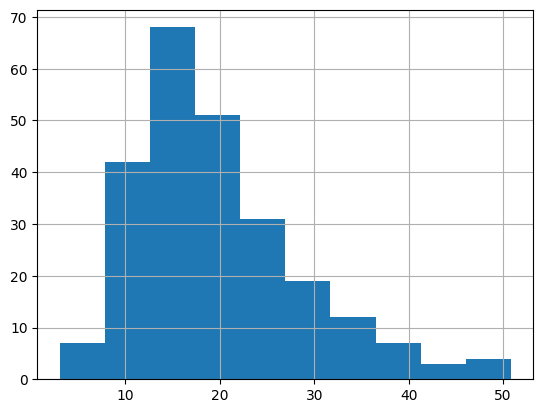

In [202]:
tips.total_bill.hist()

<Axes: >

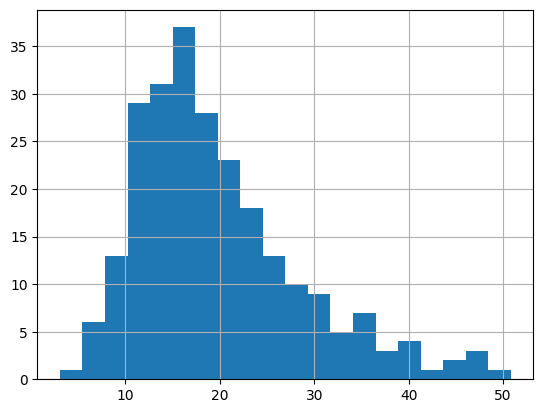

In [203]:
tips.total_bill.hist(bins = 20)

<Axes: ylabel='Frequency'>

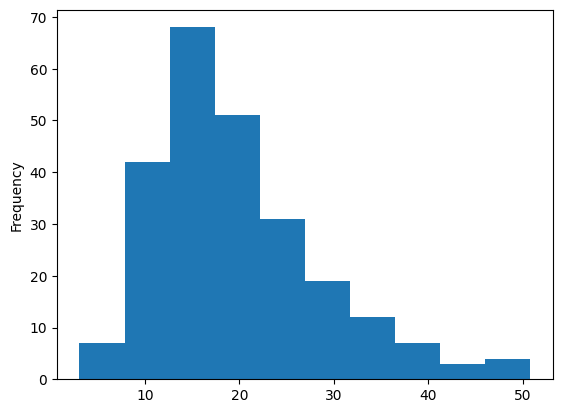

In [204]:
tips.total_bill.plot(kind = "hist")

<Axes: ylabel='Frequency'>

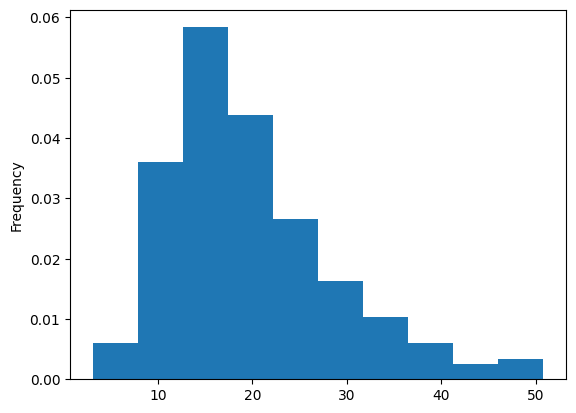

In [205]:
tips.total_bill.plot(kind="hist", density=True)

<Axes: ylabel='Density'>

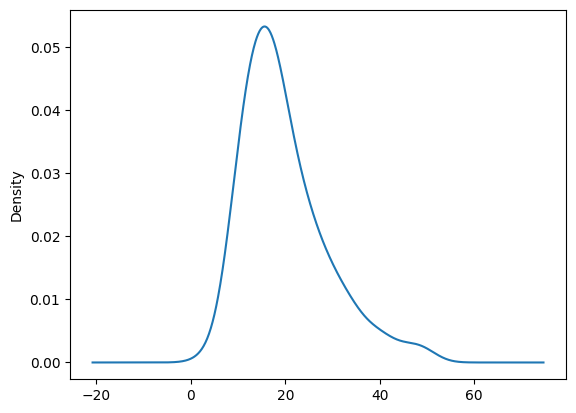

In [206]:
tips.total_bill.plot(kind = "kde")

<Axes: ylabel='Density'>

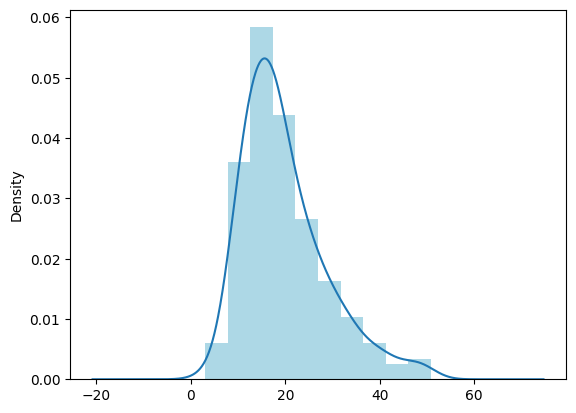

In [207]:

# A mettre ensemble pour avoir densité + histogramme sur le même graphique
tips.total_bill.plot(kind="hist", density=True, color="lightblue")
tips.total_bill.plot(kind="kde")

### Boxplots

Pandas : Fonction `boxplot()`

<Axes: >

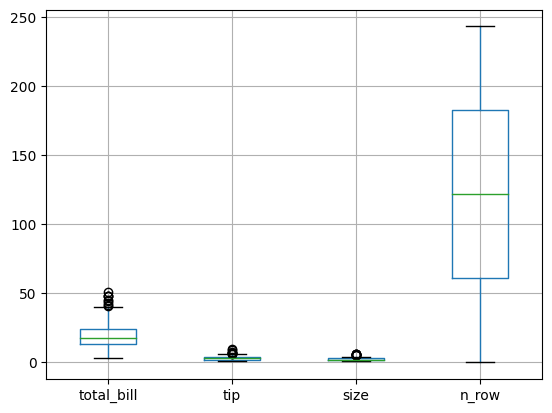

In [208]:
tips.boxplot()

<Axes: >

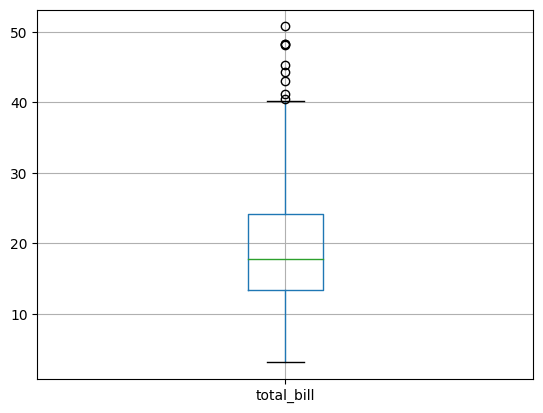

In [209]:
tips.boxplot(column="total_bill")

<Axes: >

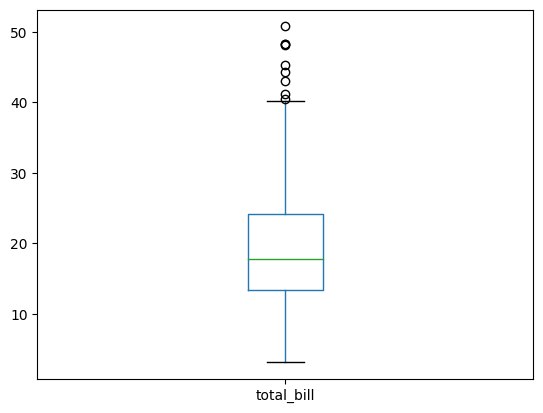

In [210]:
tips.boxplot(column="total_bill", grid=False)

Seaborn : Fonction `boxplot()`

<Axes: xlabel='total_bill'>

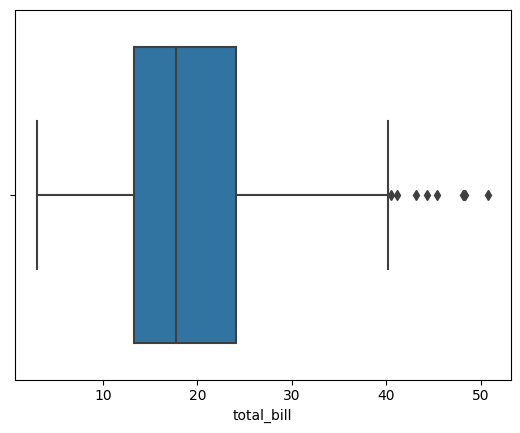

In [211]:
sns.boxplot(data=tips, x="total_bill")

<Axes: ylabel='total_bill'>

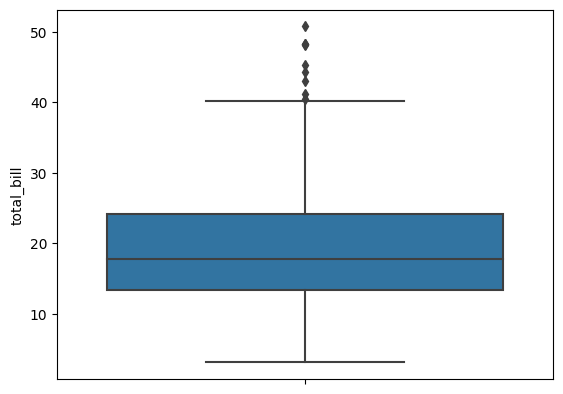

In [212]:
sns.boxplot(data=tips, y="total_bill")

<Axes: xlabel='total_bill'>

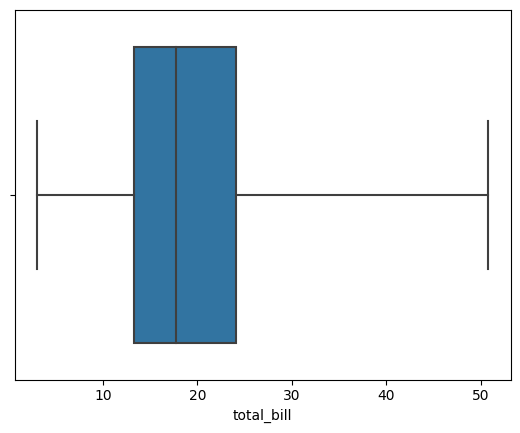

In [213]:
sns.boxplot(data=tips, x="total_bill", whis=3)

Autres représentations via Seaborn

<Axes: xlabel='total_bill'>

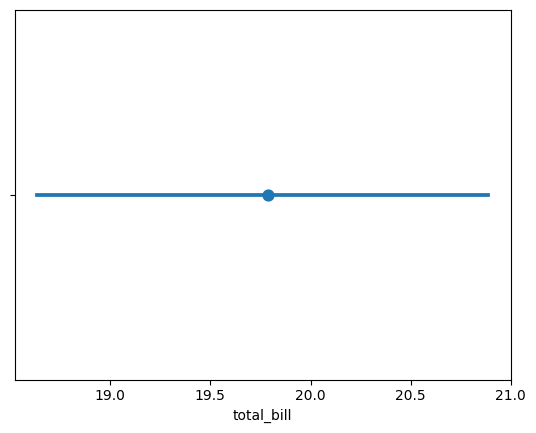

In [214]:
sns.pointplot(data=tips, x="total_bill")

<Axes: xlabel='total_bill'>

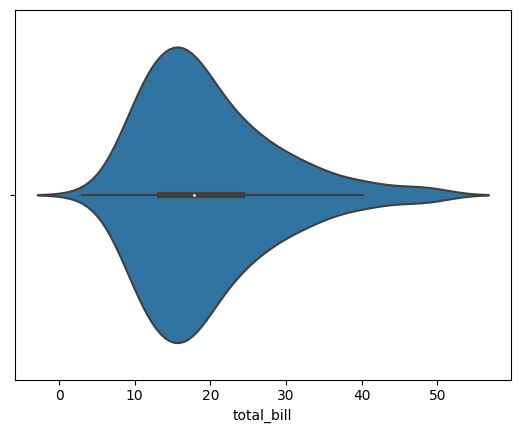

In [215]:
sns.violinplot(data=tips, x="total_bill")

<Axes: xlabel='total_bill'>

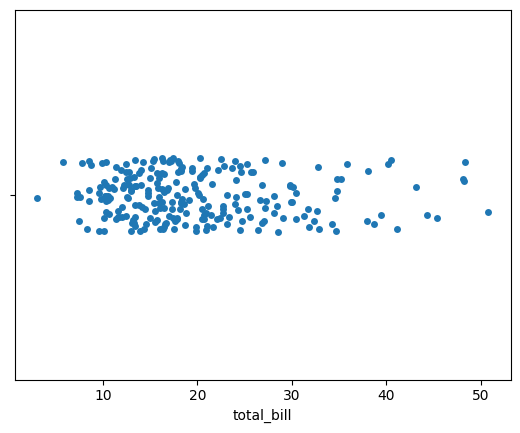

In [216]:
sns.stripplot(data=tips, x="total_bill", jitter=True)

### Qualitative

Plusieurs façons:</br>
* Table d'occurences (ou des effectifs)
* Table des proportions

In [217]:
tips.sex.describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [218]:
tips.sex.unique()

array(['Female', 'Male'], dtype=object)

In [219]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [220]:
pd.crosstab(tips.sex, "freq")

col_0,freq
sex,
Female,87
Male,157


In [221]:
# Proportion
pd.crosstab(tips.sex, "freq", normalize=True) 

col_0,freq
sex,
Female,0.356557
Male,0.643443


#### `Test d'equi-probabilité`

Un `test d'équi-probabilité` est un test statistique utilisé pour évaluer si un échantillon de données suit une `distribution uniforme` ou non.

Le `test d'équi-probabilité` est souvent utilisé pour évaluer si une variable aléatoire discrète suit une distribution uniforme, c'est-à-dire si `chaque valeur possible de la variable aléatoire a la même probabilité d'être observée`.

Le `test d'équi-probabilité` repose sur la `comparaison entre les fréquences observées et les fréquences attendues sous l'hypothèse d'une distribution uniforme`. Les fréquences attendues sont calculées en supposant que chaque valeur possible a la même probabilité d'être observée. Si les fréquences observées ne sont pas significativement différentes des fréquences attendues, cela suggère que les données suivent une distribution uniforme. En revanche, si les fréquences observées sont significativement différentes des fréquences attendues, cela suggère que les données ne suivent pas une distribution uniforme.

Le test d'équi-probabilité peut être effectué à l'aide de divers tests statistiques, tels que le `test du chi-carré` ou le `test de Kolmogorov-Smirnov`. Ces tests sont généralement simples à mettre en œuvre.

In [222]:
t = pd.crosstab(tips.sex, "freq", normalize=True)

scipy.stats.chisquare(t.freq)

Power_divergenceResult(statistic=0.08230314431604406, pvalue=0.774200187925369)

La `statistique de test` est calculée en utilisant une mesure de la `divergence entre les fréquences observées et les fréquences attendues sous l'hypothèse nulle`. Une `valeur plus élevée de la statistique de test` indique une plus `grande divergence entre les fréquences observées et les fréquences attendues`.

La `p-value` associée à la `statistique de test` indique la probabilité d'obtenir une statistique de test aussi extrême ou plus extrême que celle observée, si l'hypothèse nulle est vraie. Si la p-value est inférieure à un niveau de signification spécifié (généralement 0,05), cela suggère que l'hypothèse nulle doit être rejetée.

Dans ce cas, la valeur de la `statistique de test` est `assez faible`, ce qui suggère une `faible divergence entre les fréquences observées et les fréquences attendues`. La `p-value` est également `élevée`, ce qui suggère que la probabilité d'obtenir une statistique de test aussi extrême que celle observée, si l'`hypothèse nulle est vraie`, est relativement élevée. En général, si la p-value est supérieure à 0,05, on ne peut pas rejeter l'hypothèse nulle au niveau de signification de 0,05. Par conséquent, dans ce cas, on ne peut pas rejeter l'hypothèse nulle selon laquelle les données suivent la distribution spécifiée.

En résumé, un Power_divergenceResult avec une `statistique de test` de 0.0823 et une `p-value` de 0.7742 indique une faible divergence entre les fréquences observées et les fréquences attendues, et suggère qu'il n'y a pas suffisamment de preuves pour rejeter l'hypothèse nulle selon laquelle les données suivent la distribution spécifiée.

#### `Test de comparaison à une distribution connue`

Le `test de comparaison à une distribution connue` comme `chi carré` (ou `test du chi-carré`) est une méthode statistique qui permet de tester si une `distribution de fréquences observées dans un échantillon de données suit une distribution de probabilité théorique spécifiée`.

Le `test du chi-carré` est applicable pour tester des hypothèses sur une grande variété de distributions, y compris la `distribution normale`, la `distribution binomiale`, la `distribution de Poisson` et la `distribution exponentielle`, entre autres.

Le test consiste à calculer la `somme des carrés des écarts entre les fréquences observées et les fréquences théoriques attendues sous l'hypothèse nulle, divisée par les fréquences théoriques attendues`. Cette quantité est appelée la statistique de test du chi-carré, qui suit approximativement une distribution chi-carré sous l'hypothèse nulle.

La `p-value` associée à la statistique de test est ensuite calculée pour déterminer si la différence entre les fréquences observées et les fréquences théoriques est significative ou non. Si la valeur p est inférieure à un niveau de signification spécifié (généralement 0,05), cela suggère que l'hypothèse nulle doit être rejetée.

En résumé, le test de comparaison à une distribution connue comme chi carré est un outil statistique utile pour tester si une distribution de fréquences observées suit une distribution de probabilité théorique spécifiée. Il est largement utilisé dans de nombreux domaines, y compris la biologie, l'économie, la finance, la psychologie et la sociologie.

In [223]:
scipy.stats.chisquare(t.freq, (.2, .8))

Power_divergenceResult(statistic=0.1531888269282451, pvalue=0.6955064385613343)

On effectue un `test de chi-carré` pour mesurer la qualité de l'ajustement d'un échantillon de données à une distribution de probabilité spécifiée (si un enchantillon de données appartient ou pas à une distribution)

`statistic=0.1531888269282451` est une mesure de l'écart entre les fréquences observées et les fréquences théoriques attendues sous l'hypothèse nulle (c'est-à-dire l'ajustement parfait de la distribution). Plus la statistique de test est grande, plus la différence entre les fréquences observées et les fréquences théoriques est grande.

Dans ce cas, une statistique de test de 0.1531888269282451 avec une p-value de 0.6955064385613343 signifie que l'écart entre les fréquences observées et les fréquences théoriques n'est pas statistiquement significatif, et donc, l'hypothèse nulle d'un ajustement parfait de la distribution ne peut pas être rejetée à un niveau de signification de 0,05.

### Barplots

Pandas : Fonction `bar()` ou type "bar" pour `plot()`
* Calculs de proportions préférables parfois

In [224]:
t = pd.crosstab(tips.sex, "freq")
t

col_0,freq
sex,
Female,87
Male,157


<Axes: xlabel='sex'>

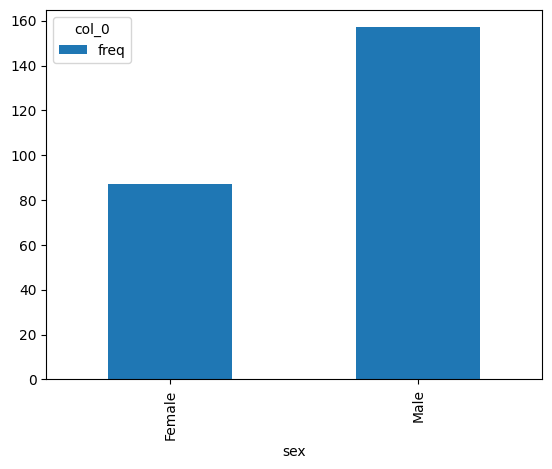

In [225]:
# t.plot(kind="bar")
t.plot.bar()

<Axes: xlabel='sex'>

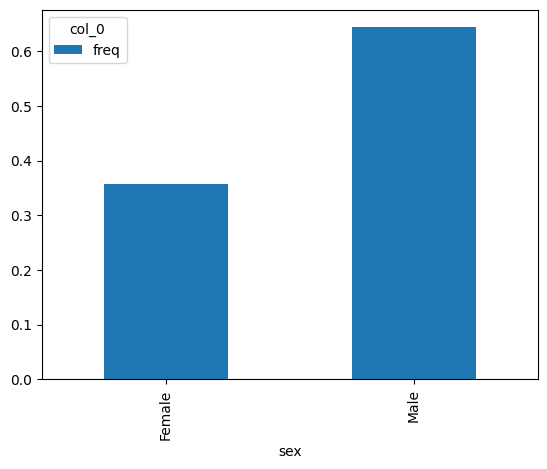

In [226]:
# En proportion
t = pd.crosstab(tips.sex, "freq", normalize=True)
t.plot(kind="bar")

<Axes: xlabel='sex'>

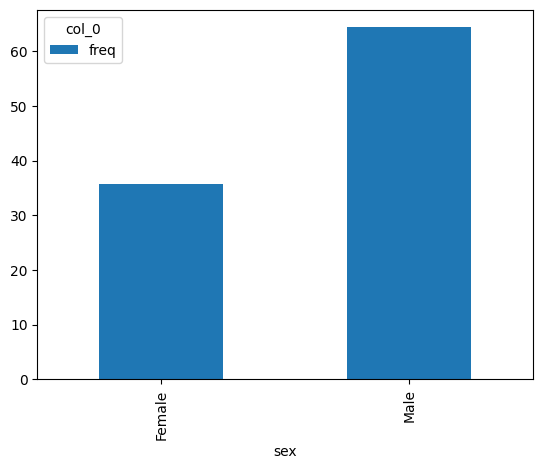

In [227]:
# En pourcentage
(t * 100).plot(kind="bar")

Seaborn : Fonctions `countplot()` ou `barplot()`

<Axes: xlabel='sex', ylabel='count'>

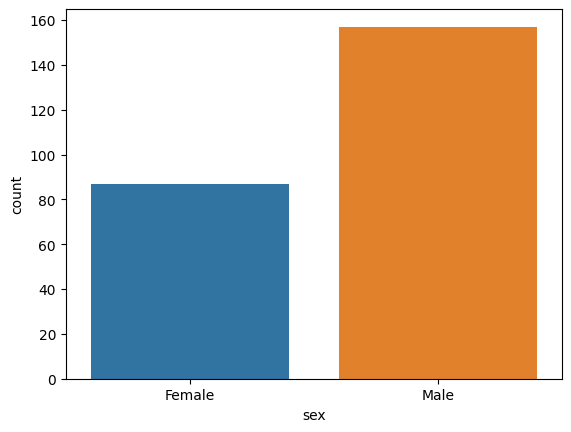

In [228]:
sns.countplot(x="sex", data=tips)

In [229]:
# En pourcentage
t = pd.crosstab(tips.sex, "freq", normalize=True)
t

col_0,freq
sex,
Female,0.356557
Male,0.643443


In [230]:
t = t.assign(sex=t.index, freq=100 * t.freq)
t

col_0,freq,sex
sex,,
Female,35.655738,Female
Male,64.344262,Male


<Axes: xlabel='sex', ylabel='freq'>

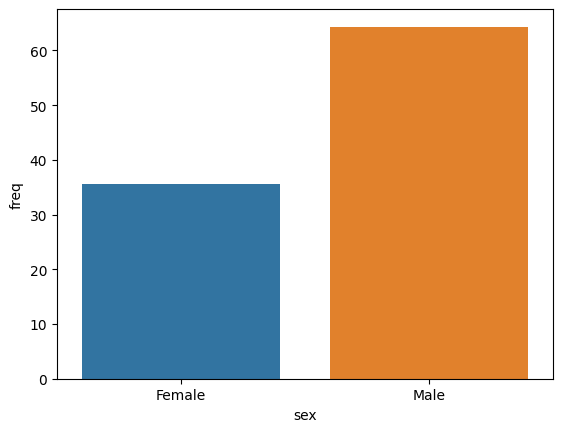

In [231]:
sns.barplot(data=t, x="sex", y="freq")

### Diagramme circulaire

Pandas : Fonction `plot.pie()`

In [232]:
t = pd.crosstab(tips.sex, "freq")
t

col_0,freq
sex,
Female,87
Male,157


array([<Axes: ylabel='freq'>], dtype=object)

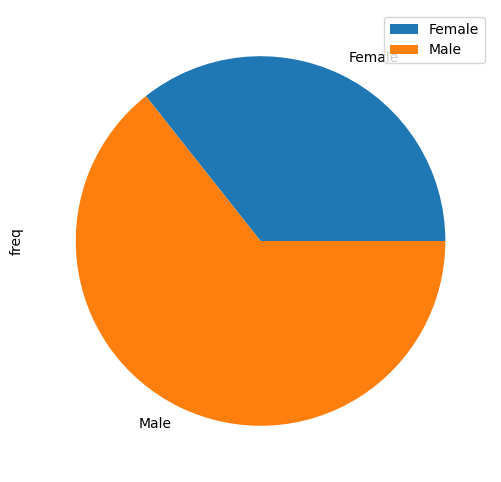

In [233]:
t.plot.pie(subplots=True, figsize=(6,6))

## Quantitative - Quantitative

In [234]:
tips.corr(numeric_only=True)

,total_bill,tip,size,n_row
total_bill,1.000000,0.675734,0.598315,0.044526
tip,0.675734,1.000000,0.489299,-0.026709
size,0.598315,0.489299,1.000000,0.008061
n_row,0.044526,-0.026709,0.008061,1.000000


In [235]:
tips.total_bill.cov(tips.tip)

8.323501629224854

In [236]:
tips.total_bill.corr(tips.tip)

0.6757341092113641

### `Test de corrélation : Pearson`

C'est une méthode statistique utilisée pour `mesurer la force de la relation linéaire entre deux variables quantitatives`. Il est utilisé pour déterminer si deux variables sont corrélées de manière significative ou non.

La corrélation de Pearson est mesurée par le coefficient de corrélation de Pearson, souvent noté "r". Le coefficient de corrélation peut varier entre -1 et 1, où -1 indique une corrélation négative parfaite, 0 indique l'absence de corrélation et 1 indique une corrélation positive parfaite.

Le test de corrélation de Pearson compare la valeur observée du coefficient de corrélation de Pearson avec la valeur critique pour un niveau de confiance donné. Si la valeur observée est supérieure à la valeur critique, alors on peut conclure que la corrélation est significative, c'est-à-dire qu'il y a une forte relation linéaire entre les deux variables. Si la valeur observée est inférieure à la valeur critique, alors on ne peut pas conclure qu'il y a une corrélation significative entre les deux variables.

In [237]:
scipy.stats.pearsonr(tips.total_bill, tips.tip)

PearsonRResult(statistic=0.6757341092113647, pvalue=6.6924706468630016e-34)

### `Test de corrélation : Kendall`

C'est une méthode statistique utilisée pour `mesurer la force de la relation entre deux variables ordinales`. Il est nommé en l'honneur du statisticien Maurice Kendall.

Contrairement au test de corrélation de Pearson, qui mesure la corrélation linéaire entre deux variables continues, le test de corrélation de Kendall mesure la corrélation non paramétrique entre deux variables ordinales. Les données ordinales sont des données qui peuvent être classées ou triées dans un ordre spécifique, mais qui ne peuvent pas être mesurées avec précision en termes numériques.

Le test de corrélation de Kendall mesure la concordance ou la discordance entre les rangs des deux variables ordinales. Le coefficient de corrélation de Kendall, souvent noté "τ", peut varier entre -1 et 1, où -1 indique une corrélation négative parfaite, 0 indique l'absence de corrélation et 1 indique une corrélation positive parfaite.

Le test de corrélation de Kendall compare la valeur observée du coefficient de corrélation de Kendall avec la valeur critique pour un niveau de confiance donné. Si la valeur observée est supérieure à la valeur critique, alors on peut conclure que la corrélation est significative, c'est-à-dire qu'il y a une forte relation entre les deux variables ordinales. Si la valeur observée est inférieure à la valeur critique, alors on ne peut pas conclure qu'il y a une corrélation significative entre les deux variables.



In [238]:
scipy.stats.kendalltau(tips.total_bill, tips.tip)

SignificanceResult(statistic=0.517180972142381, pvalue=2.445572848021409e-32)

### Nuage de points

Pandas : Fonctions `plot.scatter()` et `scatter_matrix()`

<Axes: xlabel='total_bill', ylabel='tip'>

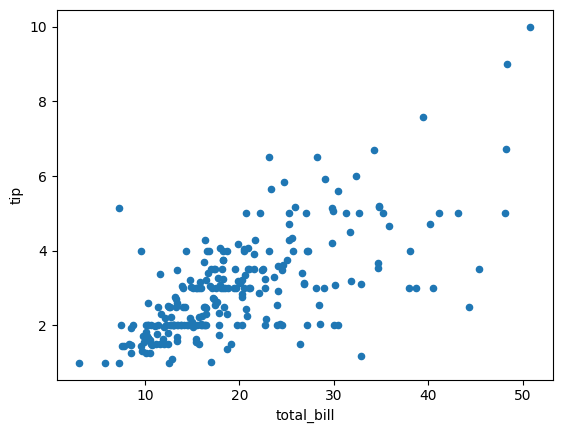

In [239]:
tips.plot.scatter("total_bill", "tip")

array([[<Axes: xlabel='total_bill', ylabel='total_bill'>,
        <Axes: xlabel='tip', ylabel='total_bill'>,
        <Axes: xlabel='size', ylabel='total_bill'>,
        <Axes: xlabel='n_row', ylabel='total_bill'>],
       [<Axes: xlabel='total_bill', ylabel='tip'>,
        <Axes: xlabel='tip', ylabel='tip'>,
        <Axes: xlabel='size', ylabel='tip'>,
        <Axes: xlabel='n_row', ylabel='tip'>],
       [<Axes: xlabel='total_bill', ylabel='size'>,
        <Axes: xlabel='tip', ylabel='size'>,
        <Axes: xlabel='size', ylabel='size'>,
        <Axes: xlabel='n_row', ylabel='size'>],
       [<Axes: xlabel='total_bill', ylabel='n_row'>,
        <Axes: xlabel='tip', ylabel='n_row'>,
        <Axes: xlabel='size', ylabel='n_row'>,
        <Axes: xlabel='n_row', ylabel='n_row'>]], dtype=object)

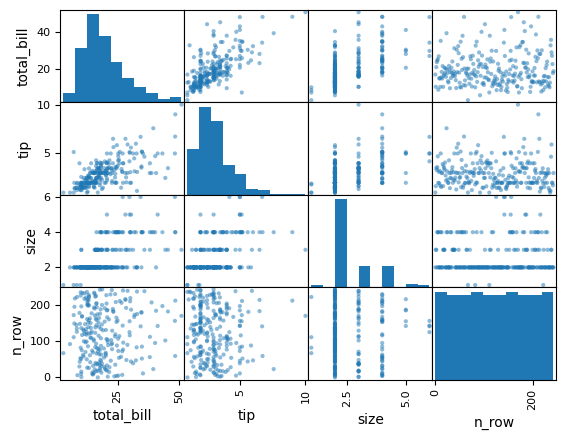

In [240]:
pd.plotting.scatter_matrix(tips)

Seaborn : Fonctions `jointplot()`, `regplot()` (ou `lmplot()`) et `pairplot()`

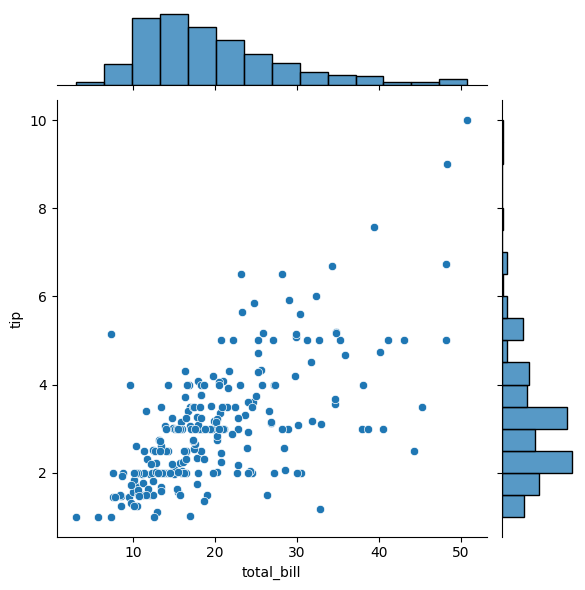

In [241]:
sns.jointplot( data=tips, x="total_bill", y="tip")

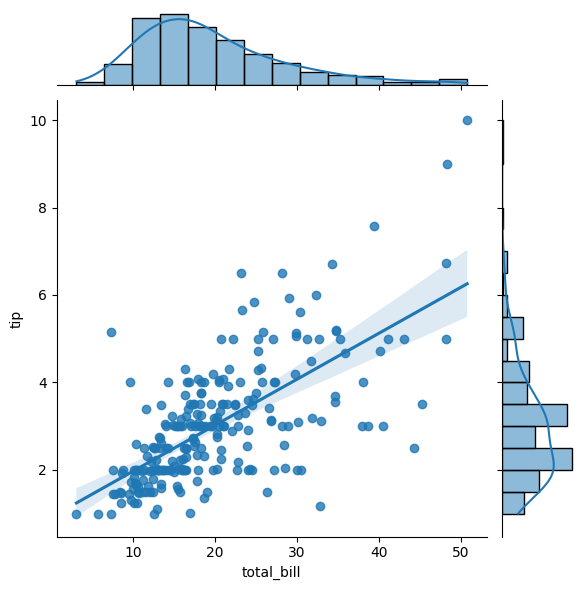

In [242]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg")

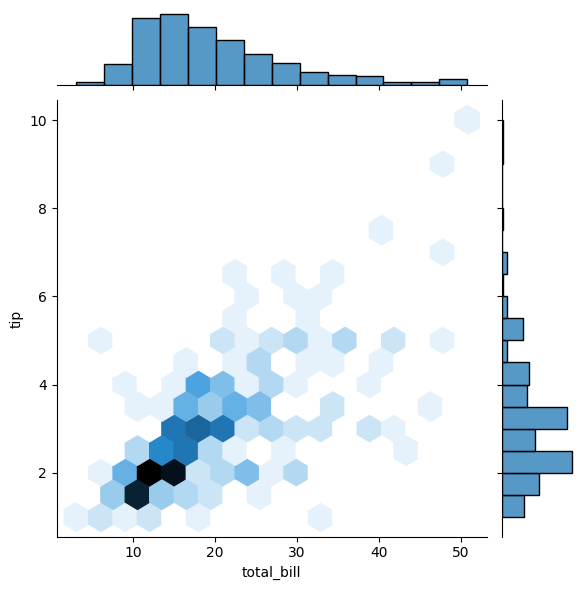

In [243]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")

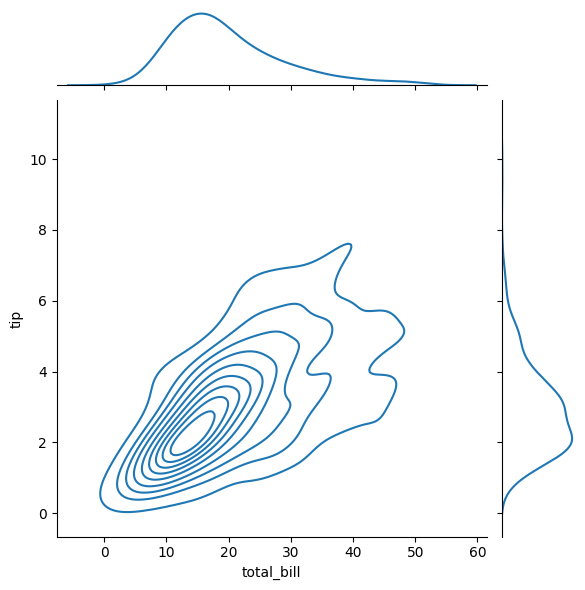

In [244]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="kde")

<Axes: xlabel='total_bill', ylabel='tip'>

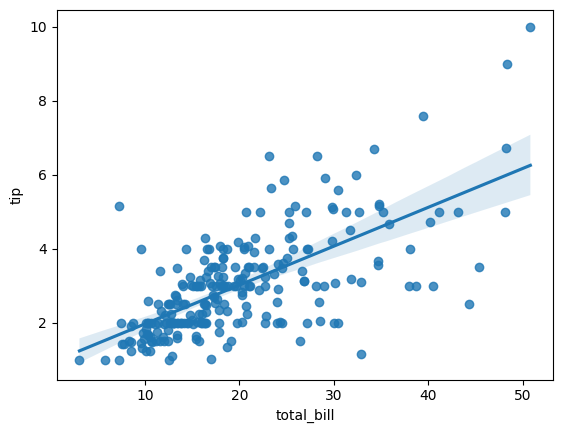

In [245]:
sns.regplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

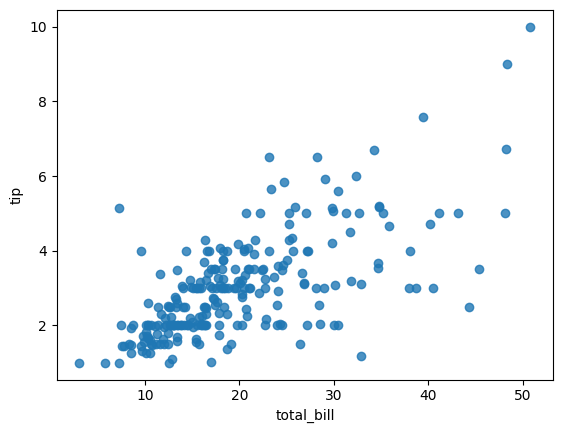

In [246]:
sns.regplot(data=tips, x="total_bill", y="tip", fit_reg=False)

<Axes: xlabel='total_bill', ylabel='tip'>

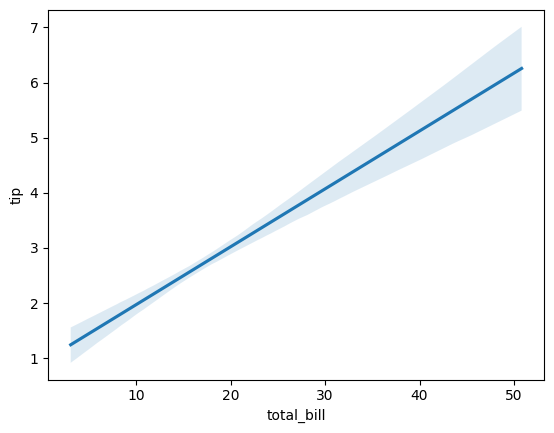

In [247]:
sns.regplot(data=tips, x="total_bill", y="tip", scatter=False)

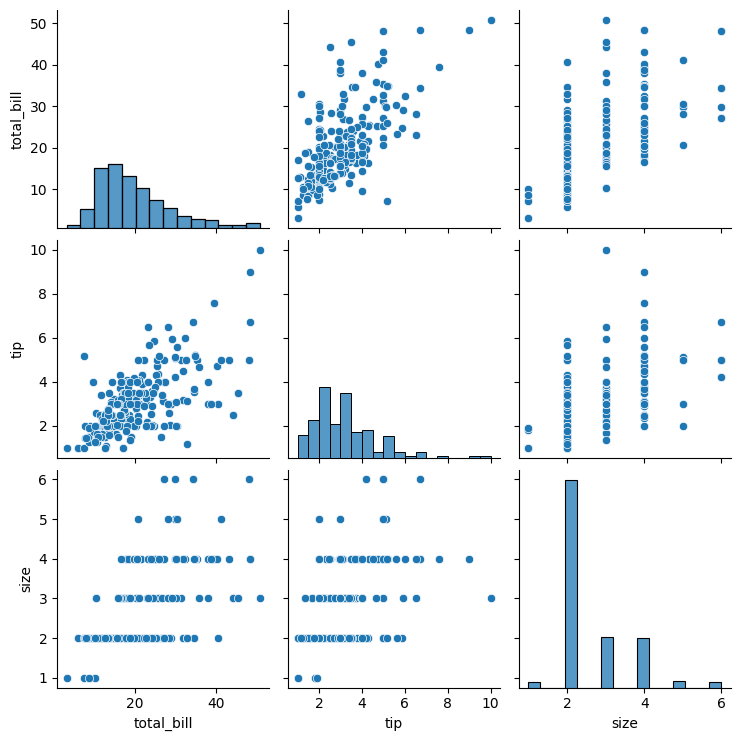

In [248]:
sns.pairplot(data=tips, vars=["total_bill", "tip", "size"])

## Qualitative - Qualitative

### Table de contingence

In [249]:
pd.crosstab(tips.sex, tips.smoker)

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [250]:
pd.crosstab(tips.sex, tips.smoker, margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


In [251]:
pd.crosstab(tips.sex, tips.smoker, normalize=True)

smoker,No,Yes
sex,,
Female,0.221311,0.135246
Male,0.397541,0.245902


Female-No  : 54 / 244 = 0.221311</br>
Female-Yes : 33 / 244 = 0.135246</br>
Male-No    : 97 / 244 = 0.397541</br>
Male-Yes   : 60 / 244 = 0.245902

### Profils lignes et profils colonnes

#### Profils lignes

In [252]:
pd.crosstab(tips.sex, tips.smoker, normalize="index")

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166


Female-No = 54, Female-Yes = 33, Female-All = 87</br>
Female-No(normalize='index') = 54 / 87 = 0.620690</br>
Female-Yes(normalize='index') = 33 / 87 = 0.379310

Male-No = 97, Male-Yes = 60, Male-All = 157</br>
Male-No(normalize='index') = 97 / 157 = 0.617834</br>
Male-Yes(normalize='index') = 60 / 157 = 0.382166

In [253]:
pd.crosstab(tips.sex, tips.smoker, normalize="index", margins=True)

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166
All,0.618852,0.381148


Smoker-No-All = 151, All = 244</br>
Smoker-No-All / All = 151 / 244 = 0.618852

Smoker-Yes-All = 93, All = 244</br>
Smoker-Yes-All / All = 93 / 244 = 0.381148

#### Profils colonnes

In [254]:
pd.crosstab(tips.sex, tips.smoker, normalize="columns")

smoker,No,Yes
sex,,
Female,0.357616,0.354839
Male,0.642384,0.645161


Female-No = 54, Male-No = 97, Smoker-No-All = 151</br>
Female-No(normalize='columns') = 54 / 151 = 0.357616</br>
Male-No(normalize='columns') = 97 / 151 = 0.642384

Female-Yes = 33, Male-Yes = 60, Smoker-Yes-All = 93</br>
Female-Yes(normalize='columns') = 33 / 93 = 0.354839</br>
Male-Yes(normalize='columns') = 60 / 93 = 0.645161

In [255]:
pd.crosstab(tips.sex, tips.smoker, normalize="columns", margins=True)

smoker,No,Yes,All
sex,,,
Female,0.357616,0.354839,0.356557
Male,0.642384,0.645161,0.643443


Female-All = 87, All = 244</br>
Female-All / All = 87 / 244 = 0.356557

Male-All = 157, All = 244</br>
Male-All / All = 157 / 244 = 0.643443

### `Test du Chi2`

Le `test du Chi2` (`chi-carré`) est un test statistique qui permet de déterminer si `deux variables catégorielles sont indépendantes ou non`. Il est souvent utilisé pour analyser les données de `tableaux de contingence`, qui sont des tableaux à double entrée qui répertorient les `fréquences observées de deux variables catégorielles`.

Le test du Chi2 repose sur l'`hypothèse nulle que les deux variables catégorielles sont indépendantes`. Pour tester cette hypothèse, on compare les fréquences observées dans les cellules du tableau de contingence avec les fréquences attendues sous l'hypothèse nulle. Si les fréquences observées sont significativement différentes des fréquences attendues, alors on rejette l'hypothèse nulle et on conclut que les deux variables catégorielles sont dépendantes.

Le test du Chi2 calcule une statistique de test, appelée "`statistique de test du Chi2`", qui mesure la différence entre les fréquences observées et les fréquences attendues. Plus cette statistique est grande, plus les fréquences observées diffèrent des fréquences attendues, et plus la probabilité d'avoir une dépendance entre les deux variables catégorielles est élevée.

In [269]:
t = pd.crosstab(tips.sex, tips.smoker)
t

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [270]:
scipy.stats.chi2_contingency(t)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[53.84016393, 33.15983607],
       [97.15983607, 59.84016393]]))

La `statistique de test` est égale à `0`, ce qui signifie qu'`il n'y a pas de différence significative entre les fréquences observées et les fréquences attendues dans le tableau de contingence`. Cette valeur faible de la statistique de test suggère que les `variables catégorielles étudiées sont indépendantes l'une de l'autre`.

La `p-value` est égale à `1.0`, ce qui signifie que la `probabilité d'obtenir une statistique de test au moins aussi extrême que celle observée sous l'hypothèse nulle (ici, l'indépendance entre les variables) est très élevée`. Autrement dit, on ne peut pas rejeter l'hypothèse nulle. La conclusion est que les variables catégorielles ne sont pas significativement dépendantes l'une de l'autre.

Le degré de liberté est égal à 1. Le degré de liberté correspond à la différence entre le nombre de cellules dans le tableau de contingence et le nombre de contraintes (ici, les contraintes sont que les totaux marginaux doivent être égaux aux totaux observés).

Les fréquences attendues sous l'hypothèse nulle sont stockées dans le tableau "expected_freq". Ces fréquences sont calculées à partir des totaux marginaux et de l'hypothèse nulle d'indépendance entre les variables.

En résumé, ces résultats indiquent que les variables catégorielles étudiées ne sont pas significativement dépendantes l'une de l'autre, et que les fréquences observées sont en accord avec les fréquences attendues sous l'hypothèse d'indépendance.

Les fréquences attendues (ou espérées) sont calculées à partir des totaux marginaux et de l'hypothèse nulle d'indépendance entre les variables. Les fréquences attendues indiquent les valeurs théoriques que l'on s'attend à observer pour chaque cellule du tableau de contingence en supposant que les variables sont indépendantes.

Les fréquences attendues pour chaque cellule du tableau de contingence sont calculées à partir de la formule suivante :

$$E_{ij} = (R_i * C_j) / n$$ 

Expected_freq(i,j) = (row_total_i * column_total_j) / grand_total

où :

* $E_{ij}$ est la fréquence attendue pour la cellule (i,j) du tableau de contingence
* $R_i$ est le total de la ième ligne du tableau de contingence,
* $C_j$ est le total de la jème colonne du tableau de contingence,
* $n$ est le nombre total d'observations dans le tableau de contingence.

La fréquence attendue $E_{ij}$ représente la proportion de sujets que l'on s'attend à observer dans la cellule $(i,j)$ sous l'hypothèse nulle d'indépendance entre les variables.

Les fréquences théoriques calculées de cette manière sont utilisées pour estimer la statistique de test du Chi2, qui mesure la distance entre les fréquences observées et les fréquences attendues sous l'hypothèse nulle d'indépendance entre les deux variables.

In [274]:
pd.crosstab(tips.sex, tips.smoker, margins=True)

smoker,No,Yes,All
sex,,,
Female,54,33,87
Male,97,60,157
All,151,93,244


Pour female=No : $(R_i * C_j) / n$ = (87 * 151) / 244 = 53.84016393</br>
Pour female=Yes : $(R_i * C_j) / n$ = (87 * 93) / 244 = 33.15983607</br>
Pour male=No : $(R_i * C_j) / n$ = (157 * 151) / 244 = 97.15983607</br>
Pour male=Yes : $(R_i * C_j) / n$ = (157 * 93) / 244 = 59.84016393

expected_freq = [[53.84016393, 33.15983607], [97.15983607, 59.84016393]]</br>
real_freq = [[54, 33], [97, 60]]


### Diagramme en Bar

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


<Axes: xlabel='sex'>

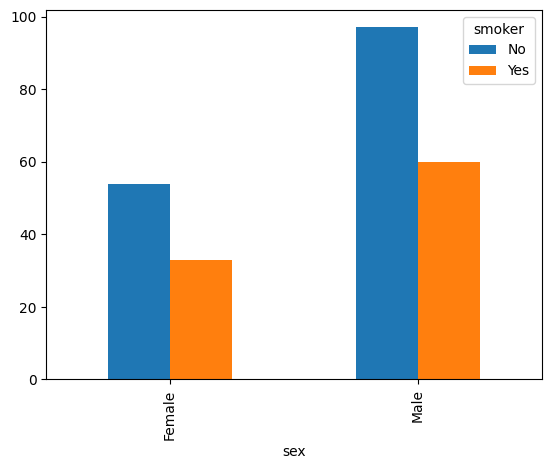

In [280]:
t = pd.crosstab(tips.sex, tips.smoker)
display(t)
t.plot.bar()

smoker,No,Yes
sex,,
Female,0.221311,0.135246
Male,0.397541,0.245902


<Axes: xlabel='sex'>

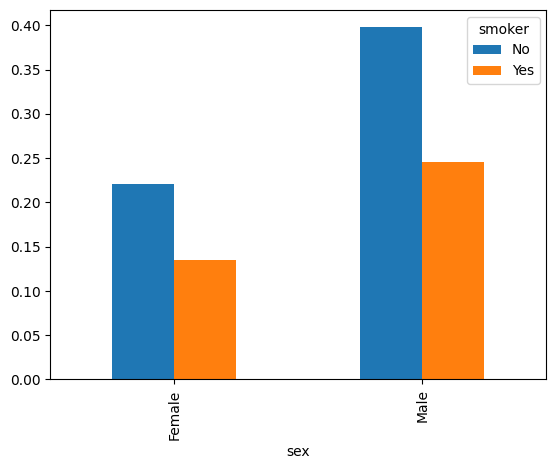

In [282]:
t = pd.crosstab(tips.sex, tips.smoker, normalize=True)
display(t)
t.plot.bar()

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166


<Axes: xlabel='sex'>

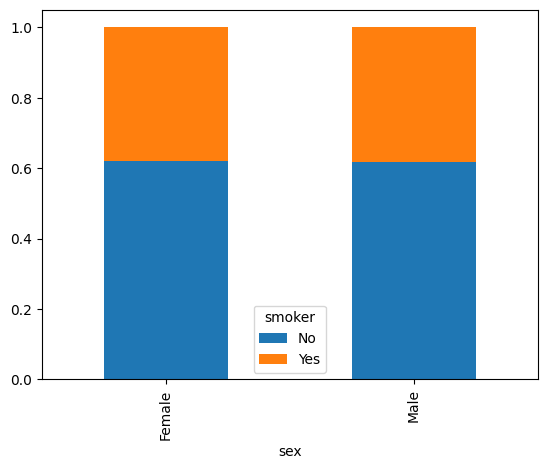

In [283]:
t = pd.crosstab(tips.sex, tips.smoker, normalize="index")
display(t)
t.plot.bar(stacked=True)

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


array([<Axes: ylabel='No'>, <Axes: ylabel='Yes'>], dtype=object)

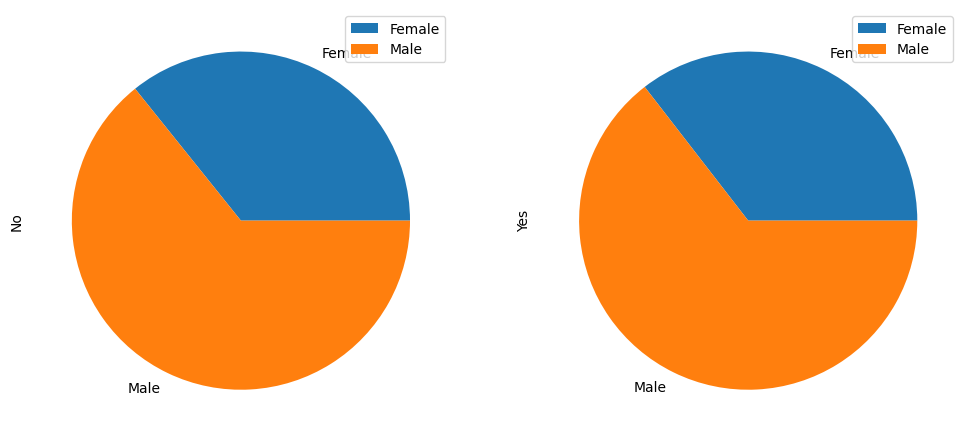

In [285]:
t = pd.crosstab(tips.sex, tips.smoker)
display(t)
t.plot.pie(subplots=True, figsize = (12, 6))

avec Seaborn

<Axes: xlabel='sex', ylabel='count'>

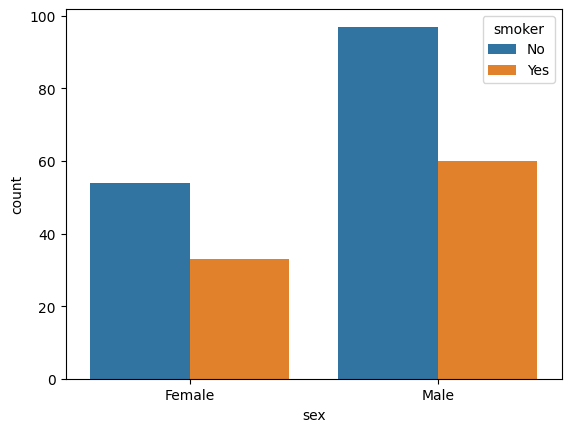

In [286]:
sns.countplot(data=tips, x="sex", hue="smoker")

In [287]:

t = pd.crosstab(tips.sex, tips.smoker, normalize="columns")
display(t)

smoker,No,Yes
sex,,
Female,0.357616,0.354839
Male,0.642384,0.645161


In [288]:
t = t.assign(sex = t.index)
display(t)

smoker,No,Yes,sex
sex,,,
Female,0.357616,0.354839,Female
Male,0.642384,0.645161,Male


In [289]:
tm = pd.melt(t, id_vars="sex")
display(tm)

,sex,smoker,value
0,Female,No,0.357616
1,Male,No,0.642384
2,Female,Yes,0.354839
3,Male,Yes,0.645161


In [290]:
tm_percent = tm.assign(value=100 * tm.value)
display(tm_percent)

,sex,smoker,value
0,Female,No,35.761589
1,Male,No,64.238411
2,Female,Yes,35.483871
3,Male,Yes,64.516129


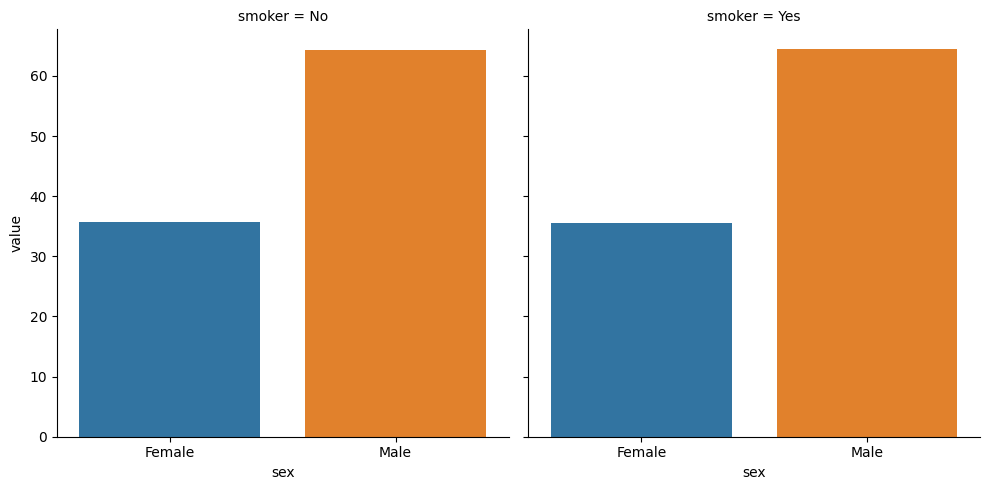

In [291]:
sns.catplot(data=tm_percent, x="sex", y="value", col="smoker", kind="bar")

## Qualitative - Quantitative

### Calcul des moyennes par modalités

Le `calcul des moyennes par modalités` est une technique d'analyse de données qui permet de `calculer la moyenne d'une variable numérique pour chaque modalité d'une variable catégorielle`.

Par exemple, si on étudie la relation entre le sexe et le salaire, on peut calculer la moyenne de salaire pour les hommes et pour les femmes séparément. Cela permet de voir s'il y a une différence significative de salaire entre les deux groupes.

Cette méthode est souvent utilisée en conjonction avec d'autres techniques d'analyse de données, telles que les tests d'hypothèses ou l'analyse de variance (ANOVA), pour déterminer si les différences observées entre les groupes sont statistiquement significatives.

Les moyennes par modalités peuvent également être utilisées pour explorer les relations entre plusieurs variables catégorielles et une variable numérique en utilisant des tableaux de contingence et des graphiques, tels que les boxplots ou les histogrammes.

Le calcul des moyennes par modalités est une méthode simple et efficace pour résumer les données numériques en fonction des catégories, ce qui permet de mieux comprendre les relations entre les variables et d'identifier les patterns et les différences significatives.

In [296]:
tips.groupby("sex").mean(numeric_only=True)

,total_bill,tip,size,n_row
sex,,,,
Female,18.056897,2.833448,2.459770,128.080460
Male,20.744076,3.089618,2.630573,117.853503


In [297]:
tips.groupby("sex")["total_bill"].agg([np.mean, np.std, np.median, np.min, np.max])

,mean,std,median,amin,amax
sex,,,,,
Female,18.056897,8.009209,16.40,3.07,44.30
Male,20.744076,9.246469,18.35,7.25,50.81


### `Test de Student` (ou `ANOVA`)

Le `test de Student`, également appelé `t-test`, est une technique d'analyse statistique qui permet de déterminer si la `différence entre les moyennes de deux groupes est statistiquement significative`. Il est utilisé pour les `données numériques, normalement distribuées` et pour lesquelles les `variances sont homogènes`.

Lorsque l'on souhaite comparer les moyennes de plus de deux groupes, on utilise une analyse de variance (ANOVA) qui permet de tester si les moyennes de plusieurs groupes sont égales ou différentes. L'ANOVA peut être utilisée pour tester l'effet d'une variable indépendante (aussi appelée facteur) sur une variable dépendante, en contrôlant les effets de facteurs confondants.

Il existe plusieurs types de tests de Student et d'ANOVA, en fonction du nombre de groupes à comparer, de la distribution des données et de l'hypothèse testée. Les tests de Student comparent deux groupes, tandis que les tests d'ANOVA comparent trois ou plus. Les variantes incluent l'ANOVA à un facteur, l'ANOVA à deux facteurs, l'ANOVA mixte, l'ANOVA de régression, entre autres.

Ces tests sont souvent utilisés en combinaison avec d'autres techniques statistiques, telles que les tests de normalité, les tests de variance, et les tests post-hoc pour comparer les moyennes entre les groupes.

In [299]:
billFemale = tips.total_bill[tips.sex == "Female"]
billFemale[:3]

0     16.99
4     24.59
11    35.26
Name: total_bill, dtype: float64

In [300]:
billMale = tips.total_bill[tips.sex == "Male"]
billMale[:3]

1    10.34
2    21.01
3    23.68
Name: total_bill, dtype: float64

In [301]:
scipy.stats.ttest_ind(billFemale, billMale)

Ttest_indResult(statistic=-2.2777940289803134, pvalue=0.0236116668468594)

`Ttest_indResult` est le résultat du `test t de Student` pour `deux échantillons indépendants`. Le résultat est donné sous forme d'un objet contenant deux valeurs: la statistique de test t et la p-value.

La `statistique de test t`, ici égale à -2.2778, mesure l'`écart entre les moyennes des deux échantillons normalisés par l'erreur standard de l'échantillon`. **Plus la valeur absolue de la statistique de test est grande, plus les moyennes des deux groupes diffèrent**. Dans ce cas, la valeur négative de la statistique de test suggère que la première moyenne est inférieure à la deuxième moyenne.

La `p-value`, ici égale à 0.0236, est la probabilité d'obtenir une statistique de test aussi extrême ou plus extrême que celle observée si les deux échantillons ont en réalité la même moyenne. Si la p-value est inférieure à un seuil de signification choisi (généralement 0,05), on rejette l'hypothèse nulle selon laquelle les moyennes sont égales et on accepte l'hypothèse alternative selon laquelle les moyennes sont différentes. Dans ce cas, la p-value est inférieure à 0,05, donc on peut conclure que les moyennes des deux échantillons sont significativement différentes.

In [302]:
billGrouped = [tips.total_bill[tips.sex == s] for s in list(tips.sex.unique())]
billGrouped # d'abord Female puis Male

[0      16.99
 4      24.59
 11     35.26
 14     14.83
 16     10.33
        ...  
 226    10.09
 229    22.12
 238    35.83
 240    27.18
 243    18.78
 Name: total_bill, Length: 87, dtype: float64,
 1      10.34
 2      21.01
 3      23.68
 5      25.29
 6       8.77
        ...  
 236    12.60
 237    32.83
 239    29.03
 241    22.67
 242    17.82
 Name: total_bill, Length: 157, dtype: float64]

In [303]:
scipy.stats.f_oneway(*billGrouped)

F_onewayResult(statistic=5.188345638458361, pvalue=0.023611666846859697)

`F_onewayResult` est le résultat de l'`Analyse de variance (ANOVA) à un facteur`, qui teste si `les moyennes de plusieurs groupes sont significativement différentes`. Le résultat est donné sous forme d'un objet contenant deux valeurs : la statistique F et la valeur p.

La `statistique F`, ici égale à `5.1883`, mesure `la variance entre les moyennes des groupes normalisée par la variance au sein des groupes`. Si la valeur de `F est grande`, cela suggère que `les moyennes des groupes sont différentes`. Dans ce cas, la valeur de F indique qu'il y a une `différence significative entre les groupes`.

La `p-value`, ici égale à `0.0236`, est la probabilité d'obtenir une statistique F aussi grande ou plus grande que celle observée si les moyennes des groupes sont en réalité égales. Si la valeur p est inférieure à un seuil de signification choisi (généralement 0,05), on rejette l'hypothèse nulle selon laquelle les moyennes sont égales et `on accepte l'hypothèse alternative` selon laquelle `les moyennes sont différentes`. Dans ce cas, la p-value est inférieure à 0,05, donc on peut conclure que `les moyennes des groupes sont significativement différentes`.

### Représentations graphiques

Pandas

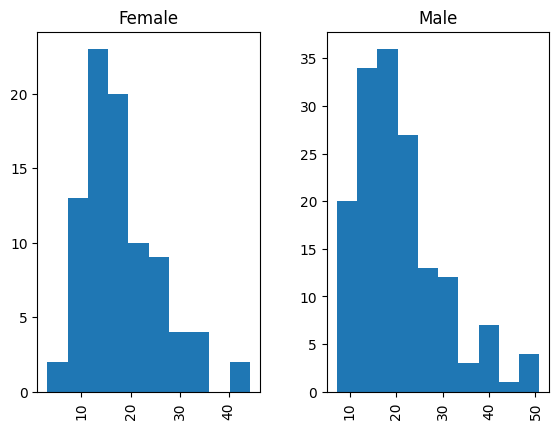

In [305]:
tips.hist(column="total_bill", by="sex");

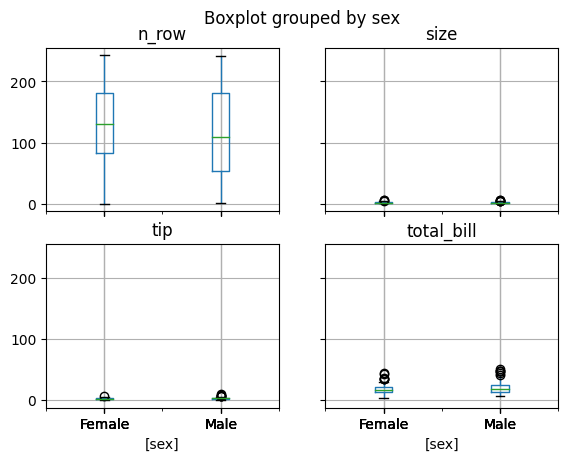

In [306]:
tips.boxplot(by="sex");

<Axes: title={'center': 'total_bill'}, xlabel='sex'>

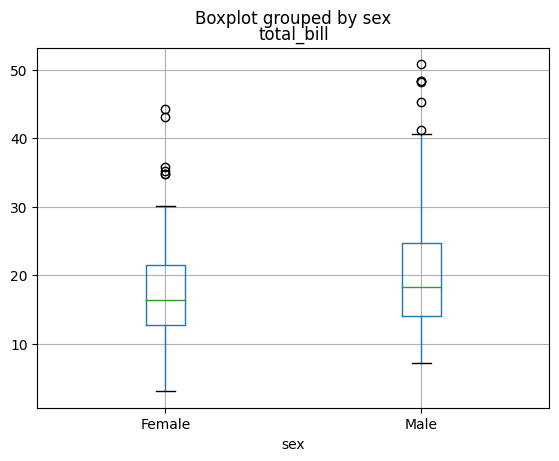

In [307]:
tips.boxplot(column="total_bill", by="sex")

Seaborn

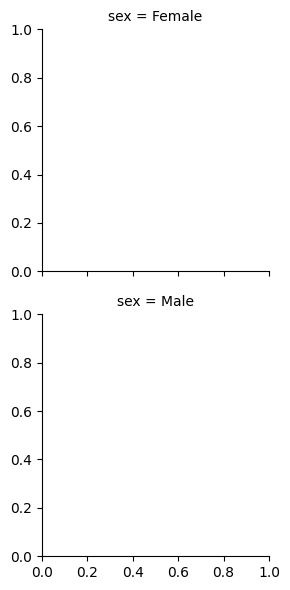

In [308]:
p = sns.FacetGrid(tips, row="sex")
p

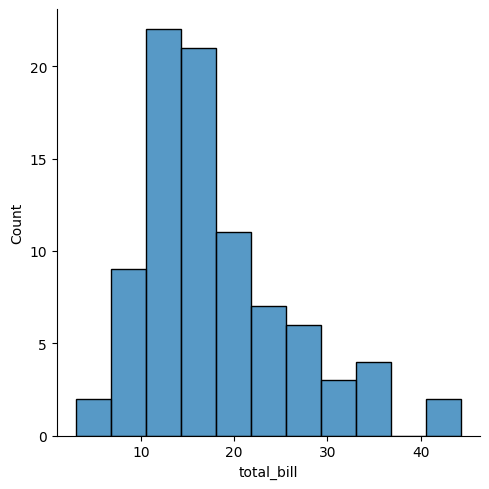

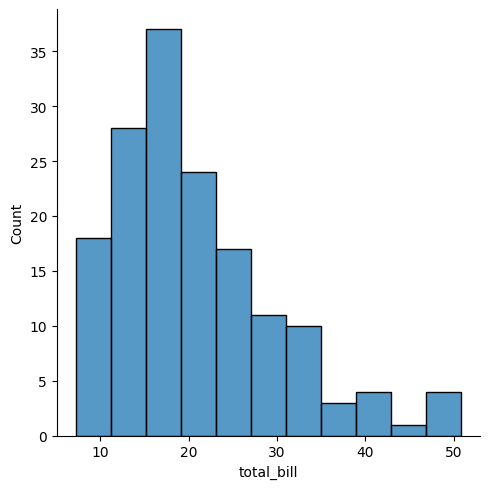

In [319]:
p.map(sns.displot, "total_bill");

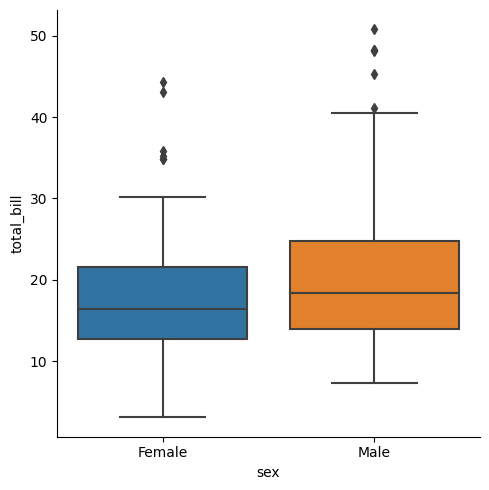

In [321]:
sns.catplot(data=tips, x="sex", y="total_bill", kind="box");

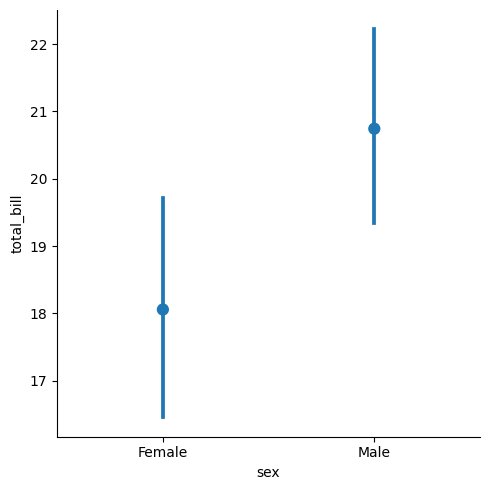

In [322]:
sns.catplot(data=tips, x="sex", y="total_bill", kind="point", join=False);

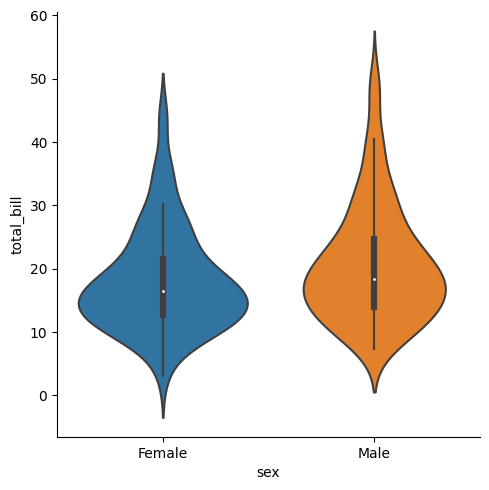

In [323]:
sns.catplot(data=tips, x="sex", y="total_bill", kind="violin");

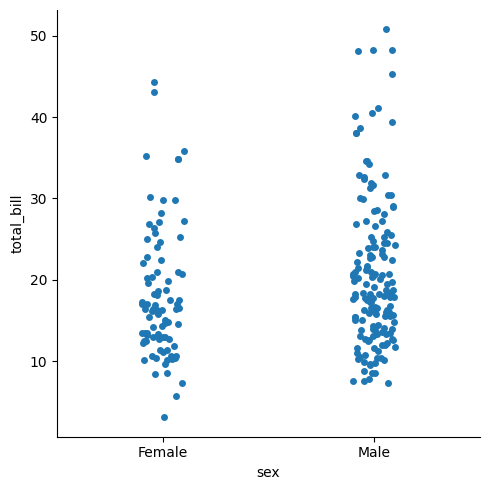

In [324]:
sns.catplot(data=tips, x="sex", y="total_bill", kind="strip");

### Compléments sur `Seaborn`

Fonction `catplot()` permettant d'en faire plusieurs

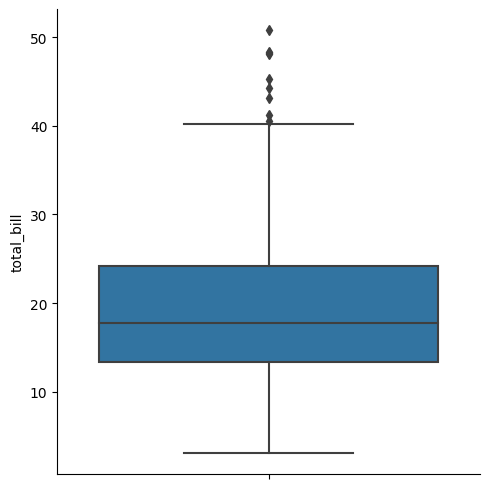

In [326]:
sns.catplot(data=tips, y="total_bill", kind="box");

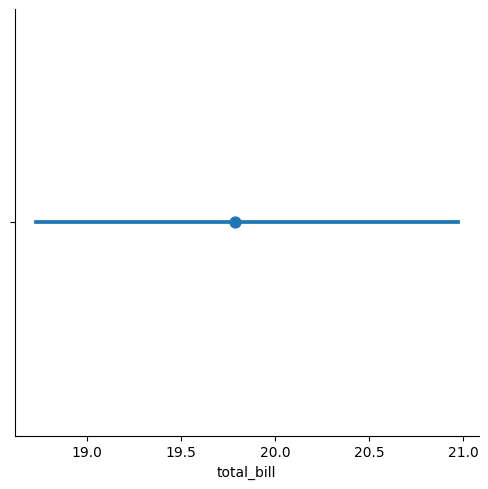

In [330]:
sns.catplot(data=tips, x="total_bill", kind="point");

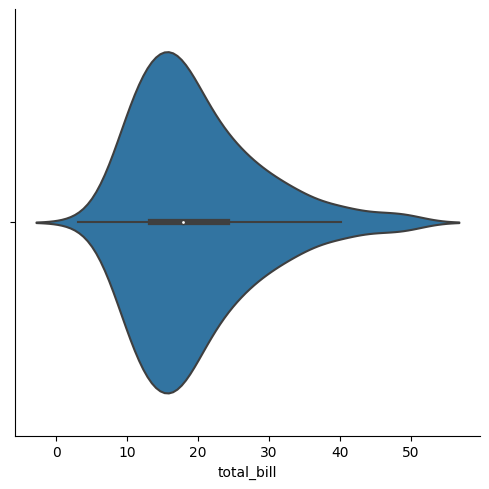

In [331]:
sns.catplot(data=tips, x="total_bill", kind="violin");

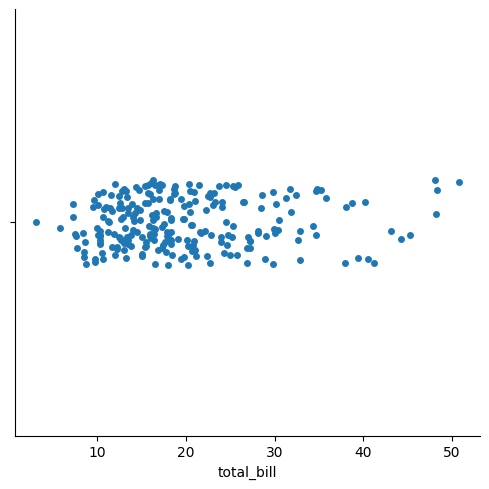

In [332]:
sns.catplot(data=tips, x="total_bill", kind="strip", jitter=True);

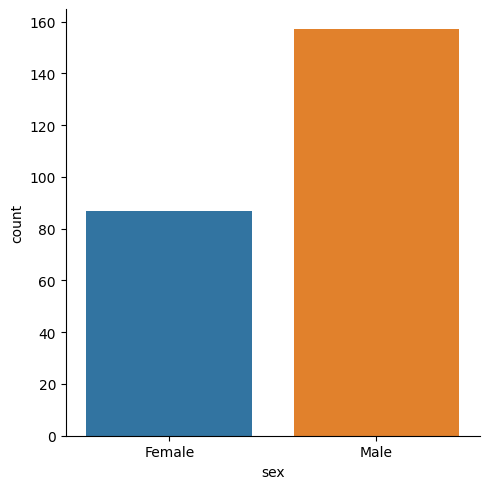

In [333]:
sns.catplot(data=tips, x="sex", kind="count");

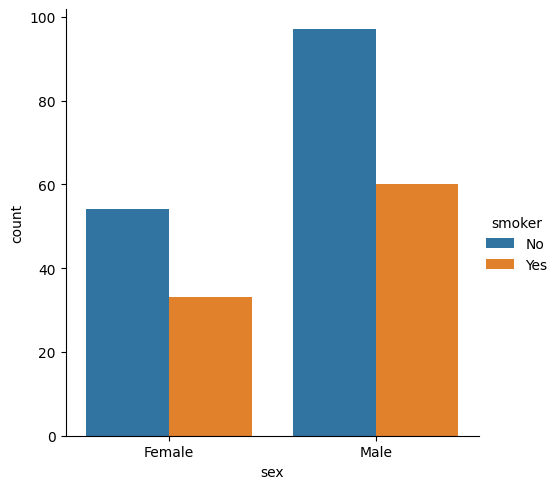

In [334]:
sns.catplot(data=tips, x="sex", hue="smoker", kind="count");

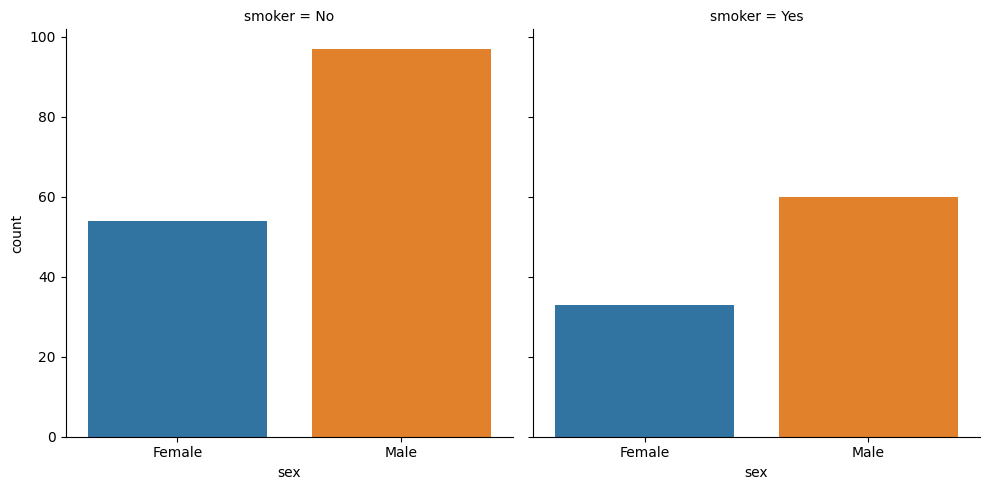

In [335]:
sns.catplot(data=tips, x="sex", col="smoker", kind="count");

Représentation de 3 variables `quantitatives`

In [341]:
pd.cut(tips.total_bill, bins=6)

0      (11.027, 18.983]
1       (3.022, 11.027]
2       (18.983, 26.94]
3       (18.983, 26.94]
4       (18.983, 26.94]
             ...       
239     (26.94, 34.897]
240     (26.94, 34.897]
241     (18.983, 26.94]
242    (11.027, 18.983]
243    (11.027, 18.983]
Name: total_bill, Length: 244, dtype: category
Categories (6, interval[float64, right]): [(3.022, 11.027] < (11.027, 18.983] < (18.983, 26.94] < (26.94, 34.897] < (34.897, 42.853] < (42.853, 50.81]]

In [338]:
t = pd.crosstab(pd.cut(tips.total_bill, bins = 6),
                    tips["size"],
                    values = tips.tip, 
                    aggfunc = np.mean)

t

size,1,2,3,4,5,6
total_bill,,,,,,
"(3.022, 11.027]",1.4375,1.872692,1.665000,NaN,NaN,NaN
"(11.027, 18.983]",NaN,2.452529,2.831250,2.720000,NaN,NaN
"(18.983, 26.94]",NaN,3.339697,3.417000,3.537333,5.00,NaN
"(26.94, 34.897]",NaN,3.063333,4.294000,4.701111,3.38,5.3
"(34.897, 42.853]",NaN,3.000000,4.335000,4.662000,5.00,NaN
"(42.853, 50.81]",NaN,NaN,5.333333,6.910000,NaN,5.0


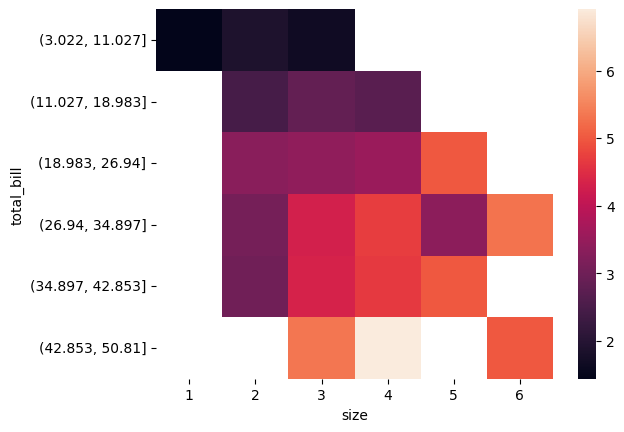

In [343]:
sns.heatmap(t);

Représentation de `2 variables quantitatives` avec `1 qualitative`

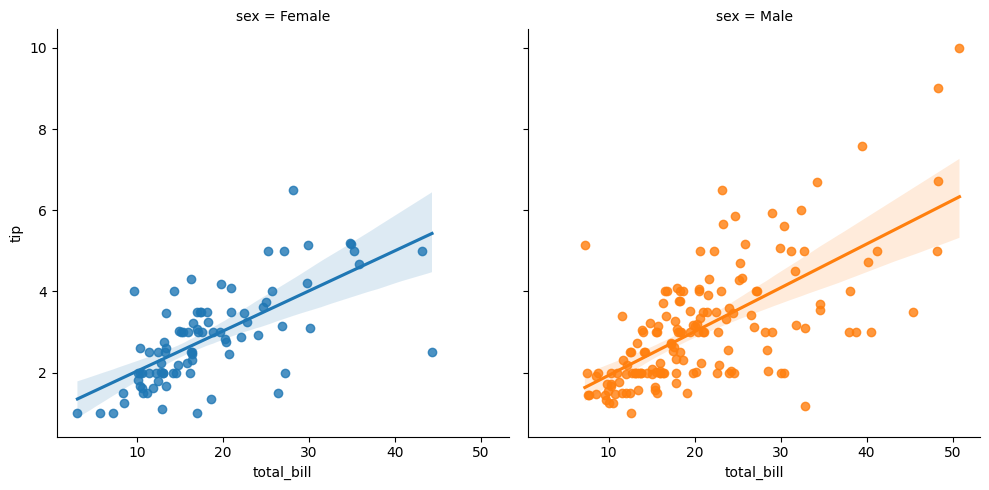

In [345]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="sex", col="sex");